In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from sklearn.decomposition import PCA
from src.utils import find_ckpt_file, convert_to_tensor
import random
from src.envs.darkroom import DarkroomEnv
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# A few example Tree Mazes

/tmp/ipykernel_941177/2007789506.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plasma_cmap = cm.get_cmap('plasma')


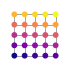

In [7]:
env = DarkroomEnv(
    maze_dim=5,
    horizon=400,
    state_dim=10,
    node_encoding_corr=0.
)

G = env.to_networkx()
pos = {node: node for node in G.nodes()}

# Create a color map using plasma
plasma_cmap = cm.get_cmap('plasma')
node_colors = []

for node in G.nodes():
    x, y = node
    index = x + y * 5  # Index by x + y*5
    # Normalize the index to [0, 1] for the colormap
    normalized_index = index / (5*5 - 1)  # Max possible index is 5*5-1
    node_colors.append(plasma_cmap(normalized_index))

plt.figure(figsize=(0.5, 0.5))
nx.draw(G, pos,
       node_color=node_colors,
       node_size=10,
       font_size=8,
       font_weight='bold',
       edge_color='gray',
       width=0.5,
       alpha=1.)
plt.savefig('figs/3a_legend.png', transparent=True, dpi=300)
plt.savefig('figs/3a_legend.svg', transparent=True, dpi=300)
plt.show()

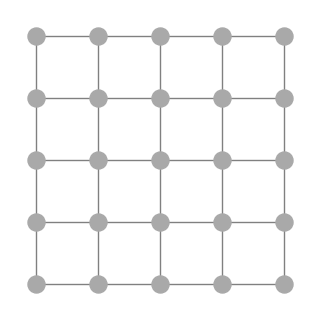

In [2]:
env = DarkroomEnv(
    maze_dim=5,
    horizon=400,
    state_dim=10,
    node_encoding_corr=0.
)

G = env.to_networkx()
pos = {node: node for node in G.nodes()}
plt.figure(figsize=(3,3))
nx.draw(G, pos,
       node_color='darkgray',
       node_size=150,
       font_size=8,
       font_weight='bold',
       edge_color='gray',
       width=1,
       alpha=1.)
plt.show()


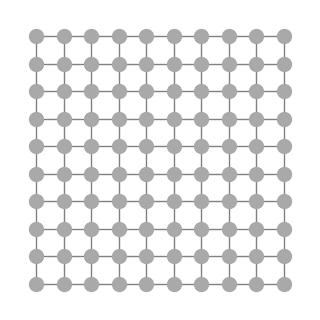

In [4]:
env = DarkroomEnv(
    maze_dim=10,
    horizon=400,
    state_dim=10,
    node_encoding_corr=0.
)

G = env.to_networkx()
pos = {node: node for node in G.nodes()}
plt.figure(figsize=(3,3))
nx.draw(G, pos,
       node_color='darkgray',
       node_size=100,
       font_size=8,
       font_weight='bold',
       edge_color='gray',
       width=1,
       alpha=1.)
plt.show()


In [26]:
samp_state = env.reset()
print(env.node_map_encoding_to_pos[tuple(samp_state)])
for _ in range(10):
    action = env.opt_action(samp_state)
    print(action)
    next_state, reward, done, _ = env.step(action)
    samp_state = next_state
    print(env.node_map_encoding_to_pos[tuple(next_state)])
    if reward == 1:
        break


(1, 0)
[1. 0. 0. 0. 0.]
(0, 0)
[0. 1. 0. 0. 0.]
(0, 1)
[0. 1. 0. 0. 0.]
(0, 2)
[0. 1. 0. 0. 0.]
(0, 3)
